# HW4 [Deception] 

## STEP 1: GET THAT DATA

In [2]:
import os
def get_data(file, path):
    f=open(path+file)
    data = f.read()
    f.close()
    return data
    
def get_data_from_files(path):
    results = [get_data(file, path) for file in os.listdir(path)]
    return results

# pos = get_data_from_files('../pos_cornell//')
# neg = get_data_from_files('../neg_cornell/')

# pos = get_data_from_files('../hw4_lie_false/')
# neg = get_data_from_files('../hw4_lie_true/')

pos = get_data_from_files('../hw4_lie_false/')
neg = get_data_from_files('../hw4_lie_true/')

In [3]:
import pandas as pd
neg_df = pd.DataFrame(neg)
pos_df = pd.DataFrame(pos)
pos_df['PoN'] = 'P'
neg_df['PoN'] = 'N'
all_df = neg_df.append(pos_df)
all_df.reset_index(drop=True,inplace=True)
all_df[:5]

0 PoN
0                                                  ?   N
1  Twin Trees Cicero NY HUGE salad bar and high q...   N
2  The worst restaurant that I have ever eaten in...   N
3                                                  ?   N
4  I have been to a Asian restaurant in New York ...   N

## STEP 2: TOKENIZE

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

### -- 2a by sentence

In [5]:
def get_sentence_tokens(review):
    return sent_tokenize(review)
    
all_df['sentences'] = all_df.apply(lambda x: get_sentence_tokens(x[0]), axis=1)
all_df['num_sentences'] = all_df.apply(lambda x: len(x['sentences']), axis=1)

### -- 2b by word

In [6]:
def get_tokens(sentence):
    tokens = word_tokenize(sentence)
    clean_tokens = [word.lower() for word in tokens if word.isalpha()]
    return clean_tokens

all_df['tokens'] = all_df.apply(lambda x: get_tokens(x[0]), axis=1)
all_df['num_tokens'] = all_df.apply(lambda x: len(x['tokens']), axis=1)

In [7]:
all_df[:3]

0 PoN  \
0                                                  ?   N   
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   

                                           sentences  num_sentences  \
0                                                [?]              1   
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   

                                              tokens  num_tokens  
0                                                 []           0  
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53  
2  [the, worst, restaurant, that, i, have, ever, ...         105

### -- 2c Remove if tokens < 1

In [8]:
all_df = all_df.drop(all_df[all_df.num_tokens < 1].index)
all_df[:3]

0 PoN  \
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   
4  I have been to a Asian restaurant in New York ...   N   

                                           sentences  num_sentences  \
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   
4  [I have been to a Asian restaurant in New York...              4   

                                              tokens  num_tokens  
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53  
2  [the, worst, restaurant, that, i, have, ever, ...         105  
4  [i, have, been, to, a, asian, restaurant, in, ...          45

## STEP 3: EXPERIMENT
#### Experiment with: stopwords, stemming, lemming etc.

### -- 3a remove english stopwords

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def remove_stopwords(sentence):
    filtered_text = []
    for word in sentence:
        if word not in stop_words:
            filtered_text.append(word)
    return filtered_text
all_df['no_sw'] = all_df.apply(lambda x: remove_stopwords(x['tokens']),axis=1)
all_df['num_no_sw'] = all_df.apply(lambda x: len(x['no_sw']),axis=1)

In [10]:
all_df[:3]

0 PoN  \
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   
4  I have been to a Asian restaurant in New York ...   N   

                                           sentences  num_sentences  \
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   
4  [I have been to a Asian restaurant in New York...              4   

                                              tokens  num_tokens  \
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53   
2  [the, worst, restaurant, that, i, have, ever, ...         105   
4  [i, have, been, to, a, asian, restaurant, in, ...          45   

                                               no_sw  num_no_sw  
1  [twin, trees, cicero, ny, huge, salad, bar, hi...         32  
2  [worst, restaurant, ever, eaten, undoubtedly, ...         49  
4  [asian, restaurant, new, york, city, menu, wri...         23

### -- 3b get stems for both tokens and no_sw

In [11]:
from nltk.stem import PorterStemmer
def get_stems(sentence):
    ps = PorterStemmer()
    return [ps.stem(w) for w in sentence]
    
all_df['stemmed'] = all_df.apply(lambda x: get_stems(x['tokens']),axis=1)
all_df['stemmed_no_sw'] = all_df.apply(lambda x: get_stems(x['no_sw']),axis=1)

In [12]:
all_df[:3]

0 PoN  \
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   
4  I have been to a Asian restaurant in New York ...   N   

                                           sentences  num_sentences  \
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   
4  [I have been to a Asian restaurant in New York...              4   

                                              tokens  num_tokens  \
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53   
2  [the, worst, restaurant, that, i, have, ever, ...         105   
4  [i, have, been, to, a, asian, restaurant, in, ...          45   

                                               no_sw  num_no_sw  \
1  [twin, trees, cicero, ny, huge, salad, bar, hi...         32   
2  [worst, restaurant, ever, eaten, undoubtedly, ...         49   
4  [asian, restaurant, new, york, city, menu, wri...         23   

                                             stemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaur, that, i, have, ever, eat...   
4  [i, have, been, to, a, asian, restaur, in, new...   

                                       stemmed_no_sw  
1  [twin, tree, cicero, ny, huge, salad, bar, hig...  
2  [worst, restaur, ever, eaten, undoubtedli, pla...  
4  [asian, restaur, new, york, citi, menu, writte...

### -- 3c get lemmas for both tokens and no_sw

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemmas(sentence):
    lem = WordNetLemmatizer() 
    return [lem.lemmatize(w) for w in sentence]
    
all_df['lemmed'] = all_df.apply(lambda x: get_lemmas(x['tokens']),axis=1)
all_df['lemmed_no_sw'] = all_df.apply(lambda x: get_lemmas(x['no_sw']),axis=1)

In [14]:
all_df[:3]

0 PoN  \
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   
4  I have been to a Asian restaurant in New York ...   N   

                                           sentences  num_sentences  \
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   
4  [I have been to a Asian restaurant in New York...              4   

                                              tokens  num_tokens  \
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53   
2  [the, worst, restaurant, that, i, have, ever, ...         105   
4  [i, have, been, to, a, asian, restaurant, in, ...          45   

                                               no_sw  num_no_sw  \
1  [twin, trees, cicero, ny, huge, salad, bar, hi...         32   
2  [worst, restaurant, ever, eaten, undoubtedly, ...         49   
4  [asian, restaurant, new, york, city, menu, wri...         23   

                                             stemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaur, that, i, have, ever, eat...   
4  [i, have, been, to, a, asian, restaur, in, new...   

                                       stemmed_no_sw  \
1  [twin, tree, cicero, ny, huge, salad, bar, hig...   
2  [worst, restaur, ever, eaten, undoubtedli, pla...   
4  [asian, restaur, new, york, citi, menu, writte...   

                                              lemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaurant, that, i, have, ever, ...   
4  [i, have, been, to, a, asian, restaurant, in, ...   

                                        lemmed_no_sw  
1  [twin, tree, cicero, ny, huge, salad, bar, hig...  
2  [worst, restaurant, ever, eaten, undoubtedly, ...  
4  [asian, restaurant, new, york, city, menu, wri...

In [15]:
all_df['pos'] = all_df.apply(lambda x: nltk.pos_tag(x['tokens']),axis=1)
all_df['pos_no_sw'] = all_df.apply(lambda x: nltk.pos_tag(x['no_sw']),axis=1)

In [16]:
def get_pos_dict(pos_tuple):
    pos_dict = {}
    for t in pos_tuple:
        if t[1] in pos_dict.keys():
            pos_dict[t[1]] += 1
        else:
            pos_dict.update({t[1]: 1})
    return pos_dict

all_df['pos_dict'] = all_df.apply(lambda x: get_pos_dict(x['pos']), axis=1)
all_df['pos_dict_no_sw'] = all_df.apply(lambda x: get_pos_dict(x['pos_no_sw']), axis=1)
all_df[:3]

0 PoN  \
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   
4  I have been to a Asian restaurant in New York ...   N   

                                           sentences  num_sentences  \
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   
4  [I have been to a Asian restaurant in New York...              4   

                                              tokens  num_tokens  \
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53   
2  [the, worst, restaurant, that, i, have, ever, ...         105   
4  [i, have, been, to, a, asian, restaurant, in, ...          45   

                                               no_sw  num_no_sw  \
1  [twin, trees, cicero, ny, huge, salad, bar, hi...         32   
2  [worst, restaurant, ever, eaten, undoubtedly, ...         49   
4  [asian, restaurant, new, york, city, menu, wri...         23   

                                             stemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaur, that, i, have, ever, eat...   
4  [i, have, been, to, a, asian, restaur, in, new...   

                                       stemmed_no_sw  \
1  [twin, tree, cicero, ny, huge, salad, bar, hig...   
2  [worst, restaur, ever, eaten, undoubtedli, pla...   
4  [asian, restaur, new, york, citi, menu, writte...   

                                              lemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaurant, that, i, have, ever, ...   
4  [i, have, been, to, a, asian, restaurant, in, ...   

                                        lemmed_no_sw  \
1  [twin, tree, cicero, ny, huge, salad, bar, hig...   
2  [worst, restaurant, ever, eaten, undoubtedly, ...   
4  [asian, restaurant, new, york, city, menu, wri...   

                                                 pos  \
1  [(twin, NN), (trees, NNS), (cicero, VBP), (ny,...   
2  [(the, DT), (worst, JJS), (restaurant, NN), (t...   
4  [(i, NNS), (have, VBP), (been, VBN), (to, TO),...   

                                           pos_no_sw  \
1  [(twin, NN), (trees, NNS), (cicero, VBP), (ny,...   
2  [(worst, RBS), (restaurant, NN), (ever, RB), (...   
4  [(asian, JJ), (restaurant, NN), (new, JJ), (yo...   

                                            pos_dict  \
1  {'NN': 11, 'NNS': 3, 'VBP': 3, 'JJ': 9, 'CC': ...   
2  {'DT': 14, 'JJS': 1, 'NN': 29, 'IN': 8, 'VBP':...   
4  {'NNS': 2, 'VBP': 2, 'VBN': 5, 'TO': 1, 'DT': ...   

                                      pos_dict_no_sw  
1  {'NN': 7, 'NNS': 5, 'VBP': 3, 'JJ': 10, 'RB': ...  
2  {'RBS': 1, 'NN': 24, 'RB': 5, 'JJ': 9, 'VBN': ...  
4  {'JJ': 5, 'NN': 11, 'VBN': 2, 'VBP': 1, 'NNS':...

In [17]:
# def get_bow_from_tokens(df, column):
#     all_column_data = ' '.join(df[column].tolist())
#     all_column_fd = Counter(all_column_data.split())
#     return all_column_fd

# # bow = get_bow_from_column(all_df, 'diy_cleaner')
# # bow =
from collections import Counter
all_df['bow'] = all_df.apply(lambda x: Counter(x['tokens']), axis=1)
all_df['bow_no_sw'] = all_df.apply(lambda x: Counter(x['no_sw']), axis=1)
all_df[:3]

0 PoN  \
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   
4  I have been to a Asian restaurant in New York ...   N   

                                           sentences  num_sentences  \
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   
4  [I have been to a Asian restaurant in New York...              4   

                                              tokens  num_tokens  \
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53   
2  [the, worst, restaurant, that, i, have, ever, ...         105   
4  [i, have, been, to, a, asian, restaurant, in, ...          45   

                                               no_sw  num_no_sw  \
1  [twin, trees, cicero, ny, huge, salad, bar, hi...         32   
2  [worst, restaurant, ever, eaten, undoubtedly, ...         49   
4  [asian, restaurant, new, york, city, menu, wri...         23   

                                             stemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaur, that, i, have, ever, eat...   
4  [i, have, been, to, a, asian, restaur, in, new...   

                                       stemmed_no_sw  \
1  [twin, tree, cicero, ny, huge, salad, bar, hig...   
2  [worst, restaur, ever, eaten, undoubtedli, pla...   
4  [asian, restaur, new, york, citi, menu, writte...   

                                              lemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaurant, that, i, have, ever, ...   
4  [i, have, been, to, a, asian, restaurant, in, ...   

                                        lemmed_no_sw  \
1  [twin, tree, cicero, ny, huge, salad, bar, hig...   
2  [worst, restaurant, ever, eaten, undoubtedly, ...   
4  [asian, restaurant, new, york, city, menu, wri...   

                                                 pos  \
1  [(twin, NN), (trees, NNS), (cicero, VBP), (ny,...   
2  [(the, DT), (worst, JJS), (restaurant, NN), (t...   
4  [(i, NNS), (have, VBP), (been, VBN), (to, TO),...   

                                           pos_no_sw  \
1  [(twin, NN), (trees, NNS), (cicero, VBP), (ny,...   
2  [(worst, RBS), (restaurant, NN), (ever, RB), (...   
4  [(asian, JJ), (restaurant, NN), (new, JJ), (yo...   

                                            pos_dict  \
1  {'NN': 11, 'NNS': 3, 'VBP': 3, 'JJ': 9, 'CC': ...   
2  {'DT': 14, 'JJS': 1, 'NN': 29, 'IN': 8, 'VBP':...   
4  {'NNS': 2, 'VBP': 2, 'VBN': 5, 'TO': 1, 'DT': ...   

                                      pos_dict_no_sw  \
1  {'NN': 7, 'NNS': 5, 'VBP': 3, 'JJ': 10, 'RB': ...   
2  {'RBS': 1, 'NN': 24, 'RB': 5, 'JJ': 9, 'VBN': ...   
4  {'JJ': 5, 'NN': 11, 'VBN': 2, 'VBP': 1, 'NNS':...   

                                                 bow  \
1  {'twin': 1, 'trees': 1, 'cicero': 1, 'ny': 1, ...   
2  {'the': 6, 'worst': 1, 'restaurant': 1, 'that'...   
4  {'i': 3, 'have': 1, 'been': 1, 'to': 1, 'a': 3...   

                                           bow_no_sw  
1  {'twin': 1, 'trees': 1, 'cicero': 1, 'ny': 1, ...  
2  {'worst': 1, 'restaurant': 1, 'ever': 1, 'eate...  
4  {'asian': 1, 'restaurant': 1, 'new': 1, 'york'...

In [18]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['bow'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['bow'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['bow'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 
def bar_plot(df, title): 
    graph = sns.barplot(y = "count", x = "word", data = df, palette = "husl")
    plt.title(title)
    plt.xlabel("Word")
    plt.ylabel("Count")
    sns.set_context("talk")
    plt.xticks(rotation = 90)
    return plt

print(bar_plot(df.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (ALL) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


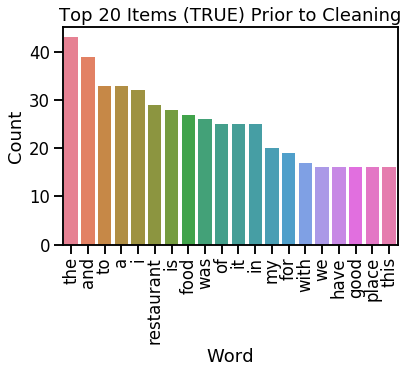

In [20]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (TRUE) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


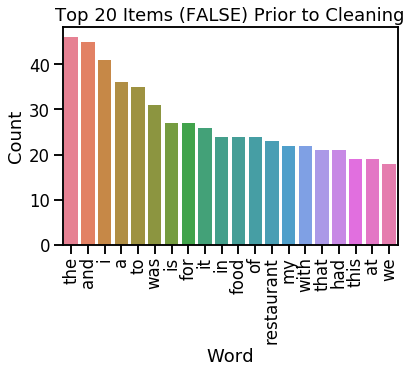

In [21]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (FALSE) Prior to Cleaning"))

In [22]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['bow_no_sw'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['bow_no_sw'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['bow_no_sw'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


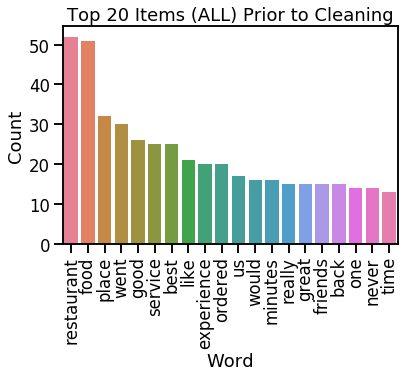

In [23]:
print(bar_plot(df.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (ALL) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


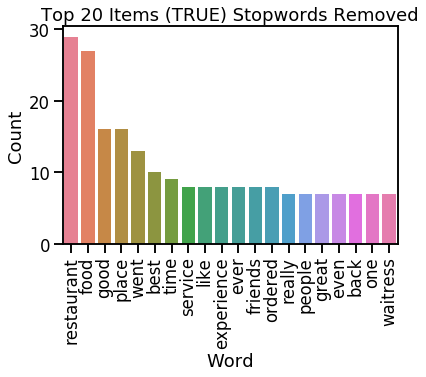

In [24]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (TRUE) Stopwords Removed"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


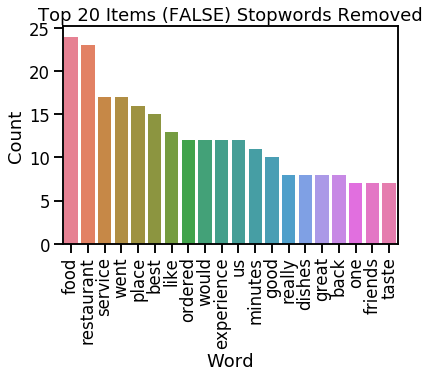

In [25]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:20], "Top 20 Items (FALSE) Stopwords Removed"))

In [26]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['pos_dict'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['pos_dict'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['pos_dict'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


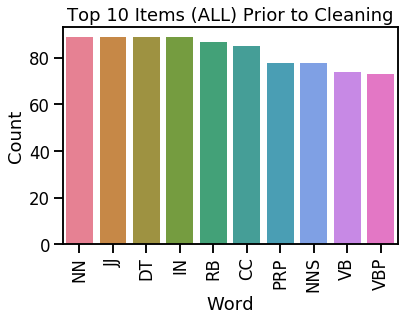

In [27]:
print(bar_plot(df.sort_values(by=["count"], ascending=False)[:10], "Top 10 Items (ALL) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


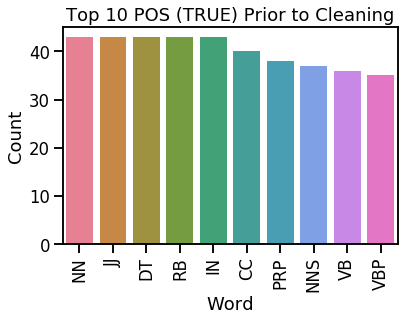

In [28]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS (TRUE) Prior to Cleaning"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


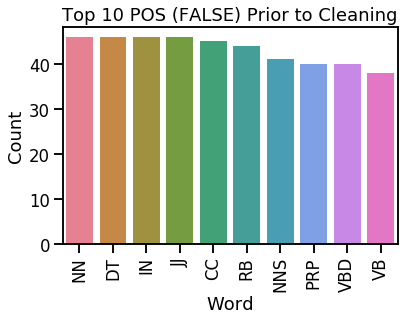

In [29]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS (FALSE) Prior to Cleaning"))

## STEP 4: TEST EXPERIMENTS!!

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def get_NB(small_df, labels):
    x_train, x_test, y_train, y_test = train_test_split(small_df.values, labels, test_size=0.3, random_state = 109)

    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    from sklearn import metrics
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

#### TEST 1: Parts of speech frequency distribution

In [31]:
pos_df = pd.DataFrame(all_df['pos_dict'].tolist(), all_df['PoN'])
pos_df[:3]

NN  NNS  VBP   JJ   CC  VBZ    DT   RB   VB   TO  ...  VBG  EX  JJR  \
PoN                                                      ...                 
N    11.0  3.0  3.0  9.0  3.0  2.0   4.0  4.0  4.0  3.0  ...  NaN NaN  NaN   
N    29.0  1.0  1.0  7.0  5.0  1.0  14.0  8.0  4.0  4.0  ...  1.0 NaN  NaN   
N    13.0  2.0  2.0  5.0  1.0  2.0   5.0  NaN  NaN  1.0  ...  NaN NaN  NaN   

     PDT  RP  WP  CD  RBR  MD  RBS  
PoN                                 
N    NaN NaN NaN NaN  NaN NaN  NaN  
N    NaN NaN NaN NaN  NaN NaN  NaN  
N    NaN NaN NaN NaN  NaN NaN  NaN  

[3 rows x 28 columns]

In [32]:
pos_df = pos_df.fillna(0).astype(int)
pos_df[:3]

NN  NNS  VBP  JJ  CC  VBZ  DT  RB  VB  TO  ...  VBG  EX  JJR  PDT  RP  \
PoN                                             ...                          
N    11    3    3   9   3    2   4   4   4   3  ...    0   0    0    0   0   
N    29    1    1   7   5    1  14   8   4   4  ...    1   0    0    0   0   
N    13    2    2   5   1    2   5   0   0   1  ...    0   0    0    0   0   

     WP  CD  RBR  MD  RBS  
PoN                        
N     0   0    0   0    0  
N     0   0    0   0    0  
N     0   0    0   0    0  

[3 rows x 28 columns]

In [33]:
get_NB(pos_df, pos_df.index)

Accuracy: 0.5925925925925926


#### TEST 1b: Normalized parts of speech frequency distribution

In [34]:
pos_df_norm = pos_df.copy()
pos_df_norm = pos_df_norm.apply(lambda x: x/x.sum(), axis=1)
pos_df_norm[:3]
pos_df_norm[1:]
test = pos_df.copy()
test['total'] = test.sum(axis = 1)
test[:3]

NN  NNS  VBP  JJ  CC  VBZ  DT  RB  VB  TO  ...  EX  JJR  PDT  RP  WP  CD  \
PoN                                             ...                             
N    11    3    3   9   3    2   4   4   4   3  ...   0    0    0   0   0   0   
N    29    1    1   7   5    1  14   8   4   4  ...   0    0    0   0   0   0   
N    13    2    2   5   1    2   5   0   0   1  ...   0    0    0   0   0   0   

     RBR  MD  RBS  total  
PoN                       
N      0   0    0     53  
N      0   0    0    105  
N      0   0    0     45  

[3 rows x 29 columns]

In [35]:
pos_df_norm[:3]

NN       NNS       VBP        JJ        CC       VBZ        DT  \
PoN                                                                         
N    0.207547  0.056604  0.056604  0.169811  0.056604  0.037736  0.075472   
N    0.276190  0.009524  0.009524  0.066667  0.047619  0.009524  0.133333   
N    0.288889  0.044444  0.044444  0.111111  0.022222  0.044444  0.111111   

           RB        VB        TO  ...       VBG   EX  JJR  PDT   RP   WP  \
PoN                                ...                                      
N    0.075472  0.075472  0.056604  ...  0.000000  0.0  0.0  0.0  0.0  0.0   
N    0.076190  0.038095  0.038095  ...  0.009524  0.0  0.0  0.0  0.0  0.0   
N    0.000000  0.000000  0.022222  ...  0.000000  0.0  0.0  0.0  0.0  0.0   

      CD  RBR   MD  RBS  
PoN                      
N    0.0  0.0  0.0  0.0  
N    0.0  0.0  0.0  0.0  
N    0.0  0.0  0.0  0.0  

[3 rows x 28 columns]

In [36]:
get_NB(pos_df_norm, pos_df.index)

Accuracy: 0.5925925925925926


In [37]:
# small_df
small_df = pos_df_norm.filter(['PRP', 'PRP$','NN'])
get_NB(small_df, pos_df.index)

Accuracy: 0.4444444444444444


In [38]:
pos_df_n = pos_df[pos_df.index == 'N']
pos_df_p = pos_df[pos_df.index == 'P']
print(pos_df['PRP'].sum())
print(pos_df_n['PRP'].sum())
print(pos_df_p['PRP'].sum())
print(pos_df_n['PRP'].sum()/pos_df['PRP'].sum())
print(pos_df_p['PRP'].sum()/pos_df['PRP'].sum())

337
160
177
0.47477744807121663
0.5252225519287834


In [39]:
pos_df_n = pos_df[pos_df.index == 'N']
pos_df_p = pos_df[pos_df.index == 'P']
print(pos_df['PRP$'].sum())
print(pos_df_n['PRP$'].sum())
print(pos_df_p['PRP$'].sum())

138
65
73


In [40]:
pos_df_n = pos_df_norm[pos_df_norm.index == 'N']
pos_df_p = pos_df_norm[pos_df_norm.index == 'P']
print(pos_df_norm['PRP'].sum())
print(pos_df_n['PRP'].sum())
print(pos_df_p['PRP'].sum())

4.256356712105416
2.060598739935355
2.19575797217006


In [41]:
pos_df_n = pos_df_norm[pos_df_norm.index == 'N']
pos_df_p = pos_df_norm[pos_df_norm.index == 'P']
print(pos_df_norm['PRP'].mean())
print(pos_df_n['PRP'].mean())
print(pos_df_p['PRP'].mean())

0.04729285235672684
0.04683178954398534
0.047733868960218695


In [42]:
pos_df_n = pos_df_norm[pos_df_norm.index == 'N']
pos_df_p = pos_df_norm[pos_df_norm.index == 'P']
print(pos_df_norm['PRP$'].mean())
print(pos_df_n['PRP$'].mean())
print(pos_df_p['PRP$'].mean())

0.0177106769174579
0.017530735194787515
0.0178827950869687


In [43]:
all_df['pos']

1     [(twin, NN), (trees, NNS), (cicero, VBP), (ny,...
2     [(the, DT), (worst, JJS), (restaurant, NN), (t...
4     [(i, NNS), (have, VBP), (been, VBN), (to, TO),...
5     [(the, DT), (best, JJS), (restaurant, NN), (i,...
6     [(the, DT), (restaurant, NN), (looked, VBD), (...
                            ...                        
87    [(mikes, NNS), (pizza, VBP), (high, JJ), (poin...
88    [(after, IN), (i, JJ), (went, VBD), (shopping,...
89    [(i, NN), (entered, VBD), (the, DT), (restaura...
90    [(carlos, NN), (plate, NN), (shack, NN), (was,...
91    [(olive, JJ), (oil, NN), (garden, NN), (was, V...
Name: pos, Length: 90, dtype: object

In [44]:
all_df['pos_sent'] = all_df.apply(lambda x: [word[1] for word in x['pos']], axis=1)
all_df['pos_sent_str'] = all_df.apply(lambda x: [' '.join(x['pos_sent'])], axis=1)
all_df['pos_no_sw_sent'] = all_df.apply(lambda x: [word[1] for word in x['pos_no_sw']], axis=1)

In [45]:
type(all_df['pos_sent_str'][1])

list

In [46]:
all_df['pos_sent_bi'] = all_df.apply(lambda x: [b for l in x['pos_sent_str'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])], axis=1)
# bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]

In [47]:
# all_df['pos_sent_tri'] = all_df.apply(lambda x: [b for l in x['pos_sent_str'] for b in zip(l.split(" ")[:-1], l.split(" ")[1:])], axis=1)


In [48]:
all_df[:4]

0 PoN  \
1  Twin Trees Cicero NY HUGE salad bar and high q...   N   
2  The worst restaurant that I have ever eaten in...   N   
4  I have been to a Asian restaurant in New York ...   N   
5  The best restaurant I have gone to is when I w...   N   

                                           sentences  num_sentences  \
1  [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2  [The worst restaurant that I have ever eaten i...              5   
4  [I have been to a Asian restaurant in New York...              4   
5  [The best restaurant I have gone to is when I ...              6   

                                              tokens  num_tokens  \
1  [twin, trees, cicero, ny, huge, salad, bar, an...          53   
2  [the, worst, restaurant, that, i, have, ever, ...         105   
4  [i, have, been, to, a, asian, restaurant, in, ...          45   
5  [the, best, restaurant, i, have, gone, to, is,...          71   

                                               no_sw  num_no_sw  \
1  [twin, trees, cicero, ny, huge, salad, bar, hi...         32   
2  [worst, restaurant, ever, eaten, undoubtedly, ...         49   
4  [asian, restaurant, new, york, city, menu, wri...         23   
5  [best, restaurant, gone, went, applebee, frien...         30   

                                             stemmed  \
1  [twin, tree, cicero, ny, huge, salad, bar, and...   
2  [the, worst, restaur, that, i, have, ever, eat...   
4  [i, have, been, to, a, asian, restaur, in, new...   
5  [the, best, restaur, i, have, gone, to, is, wh...   

                                       stemmed_no_sw  ...  \
1  [twin, tree, cicero, ny, huge, salad, bar, hig...  ...   
2  [worst, restaur, ever, eaten, undoubtedli, pla...  ...   
4  [asian, restaur, new, york, citi, menu, writte...  ...   
5  [best, restaur, gone, went, applebe, friend, s...  ...   

                                                 pos  \
1  [(twin, NN), (trees, NNS), (cicero, VBP), (ny,...   
2  [(the, DT), (worst, JJS), (restaurant, NN), (t...   
4  [(i, NNS), (have, VBP), (been, VBN), (to, TO),...   
5  [(the, DT), (best, JJS), (restaurant, NN), (i,...   

                                           pos_no_sw  \
1  [(twin, NN), (trees, NNS), (cicero, VBP), (ny,...   
2  [(worst, RBS), (restaurant, NN), (ever, RB), (...   
4  [(asian, JJ), (restaurant, NN), (new, JJ), (yo...   
5  [(best, RBS), (restaurant, NN), (gone, VBN), (...   

                                            pos_dict  \
1  {'NN': 11, 'NNS': 3, 'VBP': 3, 'JJ': 9, 'CC': ...   
2  {'DT': 14, 'JJS': 1, 'NN': 29, 'IN': 8, 'VBP':...   
4  {'NNS': 2, 'VBP': 2, 'VBN': 5, 'TO': 1, 'DT': ...   
5  {'DT': 6, 'JJS': 1, 'NN': 10, 'VBP': 2, 'VBN':...   

                                      pos_dict_no_sw  \
1  {'NN': 7, 'NNS': 5, 'VBP': 3, 'JJ': 10, 'RB': ...   
2  {'RBS': 1, 'NN': 24, 'RB': 5, 'JJ': 9, 'VBN': ...   
4  {'JJ': 5, 'NN': 11, 'VBN': 2, 'VBP': 1, 'NNS':...   
5  {'RBS': 1, 'NN': 7, 'VBN': 1, 'VBD': 2, 'JJ': ...   

                                                 bow  \
1  {'twin': 1, 'trees': 1, 'cicero': 1, 'ny': 1, ...   
2  {'the': 6, 'worst': 1, 'restaurant': 1, 'that'...   
4  {'i': 3, 'have': 1, 'been': 1, 'to': 1, 'a': 3...   
5  {'the': 5, 'best': 1, 'restaurant': 2, 'i': 4,...   

                                           bow_no_sw  \
1  {'twin': 1, 'trees': 1, 'cicero': 1, 'ny': 1, ...   
2  {'worst': 1, 'restaurant': 1, 'ever': 1, 'eate...   
4  {'asian': 1, 'restaurant': 1, 'new': 1, 'york'...   
5  {'best': 1, 'restaurant': 2, 'gone': 1, 'went'...   

                                            pos_sent  \
1  [NN, NNS, VBP, JJ, JJ, NN, NN, CC, JJ, NN, JJ,...   
2  [DT, JJS, NN, IN, NN, VBP, RB, VBN, IN, VBZ, R...   
4  [NNS, VBP, VBN, TO, DT, JJ, NN, IN, JJ, NN, NN...   
5  [DT, JJS, NN, NN, VBP, VBN, TO, VBZ, WRB, JJ, ...   

                                        pos_sent_str  \
1  [NN NNS VBP JJ JJ NN NN CC JJ NN JJ VBZ DT NN ...   
2  [DT JJS NN IN NN VBP RB VBN IN VBZ RB DT NN VB..

In [49]:
test = all_df['pos_sent_str'][1]
test

['NN NNS VBP JJ JJ NN NN CC JJ NN JJ VBZ DT NN VBZ RB JJ RB CC JJ VB JJ TO VB DT NN TO VB NN IN RB RB IN PRP VBP VBN IN DT JJ NNS DT NN VBP JJ IN PRP$ NNS CC NN TO VB NN NN']

In [50]:
text = ["this is a sentence", "so is this one"]
test2 = ["NN NNS VBP JJ JJ NN NN CC JJ NN JJ VBZ DT NN VBZ RB JJ RB CC JJ VB JJ TO VB DT NN TO VB NN IN RB RB IN", "PRP VBP VBN IN DT JJ NNS DT NN VBP JJ IN PRP$ NNS CC NN TO VB NN NN"]
test1 = ['NN NNS VBP JJ JJ NN NN CC JJ NN JJ VBZ DT NN VBZ RB JJ RB CC JJ VB JJ TO VB DT NN TO VB NN IN RB RB IN PRP VBP VBN IN DT JJ NNS DT NN VBP JJ IN PRP$ NNS CC NN TO VB NN NN']
bigrams = [b for l in test1 for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
print(bigrams)

[('NN', 'NNS'), ('NNS', 'VBP'), ('VBP', 'JJ'), ('JJ', 'JJ'), ('JJ', 'NN'), ('NN', 'NN'), ('NN', 'CC'), ('CC', 'JJ'), ('JJ', 'NN'), ('NN', 'JJ'), ('JJ', 'VBZ'), ('VBZ', 'DT'), ('DT', 'NN'), ('NN', 'VBZ'), ('VBZ', 'RB'), ('RB', 'JJ'), ('JJ', 'RB'), ('RB', 'CC'), ('CC', 'JJ'), ('JJ', 'VB'), ('VB', 'JJ'), ('JJ', 'TO'), ('TO', 'VB'), ('VB', 'DT'), ('DT', 'NN'), ('NN', 'TO'), ('TO', 'VB'), ('VB', 'NN'), ('NN', 'IN'), ('IN', 'RB'), ('RB', 'RB'), ('RB', 'IN'), ('IN', 'PRP'), ('PRP', 'VBP'), ('VBP', 'VBN'), ('VBN', 'IN'), ('IN', 'DT'), ('DT', 'JJ'), ('JJ', 'NNS'), ('NNS', 'DT'), ('DT', 'NN'), ('NN', 'VBP'), ('VBP', 'JJ'), ('JJ', 'IN'), ('IN', 'PRP$'), ('PRP$', 'NNS'), ('NNS', 'CC'), ('CC', 'NN'), ('NN', 'TO'), ('TO', 'VB'), ('VB', 'NN'), ('NN', 'NN')]


In [51]:
# all_bigrams = [bigram for bigram in all_df.pos_sent_bi.tolist()]
# flat_list = [item for sublist in l for item in sublist]
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']
all_bigrams = [bigram for sublist in all_df.pos_sent_bi.tolist() for bigram in sublist]
all_bigrams_n = [bigram for sublist in all_df_n.pos_sent_bi.tolist() for bigram in sublist]
all_bigrams_p = [bigram for sublist in all_df_p.pos_sent_bi.tolist() for bigram in sublist]
all_bigrams[:5]

[('NN', 'NNS'), ('NNS', 'VBP'), ('VBP', 'JJ'), ('JJ', 'JJ'), ('JJ', 'NN')]

In [52]:
count = Counter(all_bigrams)
count_n = Counter(all_bigrams_n)
count_p = Counter(all_bigrams_p)

In [53]:
count.most_common()[:5]

import numpy as np

# all_df['bow_v3'] = all_df.apply(lambda x: Counter(casual_tokenize(x['pruned'])), axis=1)
# new_df = pd.DataFrame(all_df['bow_v3'].tolist(), all_df['PoN'])

# most_common_pos = [word[0] for word in big_bow_p.most_common(100)]
# print("Unique values in array1 that are not in array2:")
most_common_n = [word[0] for word in count_n.most_common(10)]
most_common_p = [word[0] for word in count_p.most_common(10)]

neg_notpos = np.setdiff1d(most_common_n, most_common_p)
neg_notpos

# all_bigrams_n

array(['VBZ'], dtype='<U3')

In [54]:
all_df_n = all_df[all_df['PoN'] == 'N']
all_df_p = all_df[all_df['PoN'] == 'P']

big_bow = [item for review in all_df['pos_sent_bi'].tolist() for item in review]
big_bow_n = [item for review in all_df_n['pos_sent_bi'].tolist() for item in review]
big_bow_p = [item for review in all_df_p['pos_sent_bi'].tolist() for item in review]

df = pd.DataFrame.from_dict(Counter(big_bow), orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})

df_n = pd.DataFrame.from_dict(Counter(big_bow_n), orient='index').reset_index()
df_n = df_n.rename(columns={'index':'word', 0:'count'})

df_p = pd.DataFrame.from_dict(Counter(big_bow_p), orient='index').reset_index()
df_p = df_p.rename(columns={'index':'word', 0:'count'})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


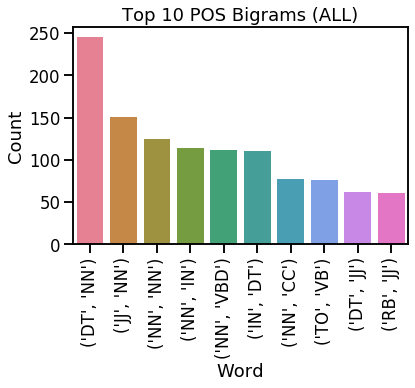

In [55]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS Bigrams (ALL)"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


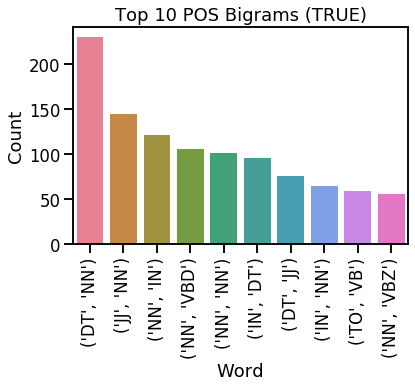

In [56]:
print(bar_plot(df_n.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS Bigrams (TRUE)"))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>


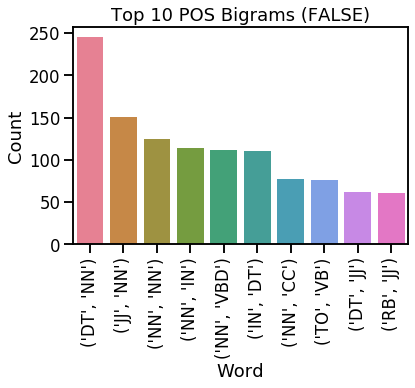

In [57]:
print(bar_plot(df_p.sort_values(by=["count"], ascending=False)[:10], "Top 10 POS Bigrams (FALSE)"))

In [82]:
all_df['bow_pos'] = all_df.apply(lambda x: Counter(x['pos_sent_bi']), axis=1)

new_df = pd.DataFrame(all_df['bow_pos'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

(NN, NNS)  (NNS, VBP)  (VBP, JJ)  (JJ, JJ)  (JJ, NN)  (NN, NN)  (NN, CC)  \
PoN                                                                             
N            1           1          2         1         2         2         1   
N            1           0          0         0         2         4         3   
N            0           1          0         0         2         4         0   
N            0           0          0         0         4         1         0   
N            0           0          0         0         1         0         1   

     (CC, JJ)  (NN, JJ)  (JJ, VBZ)  ...  (WDT, MD)  (WRB, MD)  (MD, DT)  \
PoN                                 ...                                   
N           2         1          1  ...          0          0         0   
N           0         0          0  ...          0          0         0   
N           1         0          0  ...          0          0         0   
N           1         0          0  ...          0          0         0   
N           0         0          0  ...          0          0         0   

     (NNS, JJR)  (JJR, EX)  (VBP, MD)  (JJS, WRB)  (CD, RB)  (JJS, VBG)  \
PoN                                                                       
N             0          0          0           0         0           0   
N             0          0          0           0         0           0   
N             0          0          0           0         0           0   
N             0          0          0           0         0           0   
N             0          0          0           0         0           0   

     (RP, TO)  
PoN            
N           0  
N           0  
N           0  
N           0  
N           0  

[5 rows x 389 columns]

In [83]:
get_NB(new_df, new_df.index)

Accuracy: 0.4444444444444444


In [88]:
bi_df_norm = new_df.copy()
bi_df_norm = bi_df_norm.apply(lambda x: x/x.sum(), axis=1)
# bi_df_norm = bi_df_norm.apply(lambda x: x/x.sum(), axis=1)
bi_df_norm

get_NB(bi_df_norm, bi_df_norm.index)
bi_df_norm

Accuracy: 0.48148148148148145


(NN, NNS)  (NNS, VBP)  (VBP, JJ)  (JJ, JJ)  (JJ, NN)  (NN, NN)  (NN, CC)  \
PoN                                                                             
N     0.019231    0.019231   0.038462  0.019231  0.038462  0.038462  0.019231   
N     0.009615    0.000000   0.000000  0.000000  0.019231  0.038462  0.028846   
N     0.000000    0.022727   0.000000  0.000000  0.045455  0.090909  0.000000   
N     0.000000    0.000000   0.000000  0.000000  0.057143  0.014286  0.000000   
N     0.000000    0.000000   0.000000  0.000000  0.028571  0.000000  0.028571   
..         ...         ...        ...       ...       ...       ...       ...   
P     0.000000    0.023810   0.023810  0.000000  0.071429  0.023810  0.023810   
P     0.000000    0.000000   0.000000  0.000000  0.000000  0.043478  0.000000   
P     0.000000    0.000000   0.000000  0.000000  0.030612  0.020408  0.020408   
P     0.000000    0.006494   0.000000  0.012987  0.038961  0.071429  0.025974   
P     0.000000    0.000000   0.023810  0.000000  0.119048  0.047619  0.023810   

     (CC, JJ)  (NN, JJ)  (JJ, VBZ)  ...  (WDT, MD)  (WRB, MD)  (MD, DT)  \
PoN                                 ...                                   
N    0.038462  0.019231   0.019231  ...        0.0        0.0       0.0   
N    0.000000  0.000000   0.000000  ...        0.0        0.0       0.0   
N    0.022727  0.000000   0.000000  ...        0.0        0.0       0.0   
N    0.014286  0.000000   0.000000  ...        0.0        0.0       0.0   
N    0.000000  0.000000   0.000000  ...        0.0        0.0       0.0   
..        ...       ...        ...  ...        ...        ...       ...   
P    0.000000  0.023810   0.000000  ...        0.0        0.0       0.0   
P    0.000000  0.000000   0.000000  ...        0.0        0.0       0.0   
P    0.010204  0.010204   0.000000  ...        0.0        0.0       0.0   
P    0.000000  0.000000   0.000000  ...        0.0        0.0       0.0   
P    0.023810  0.000000   0.000000  ...        0.0        0.0       0.0   

     (NNS, JJR)  (JJR, EX)  (VBP, MD)  (JJS, WRB)  (CD, RB)  (JJS, VBG)  \
PoN                                                                       
N           0.0        0.0        0.0     0.00000  0.000000    0.000000   
N           0.0        0.0        0.0     0.00000  0.000000    0.000000   
N           0.0        0.0        0.0     0.00000  0.000000    0.000000   
N           0.0        0.0        0.0     0.00000  0.000000    0.000000   
N           0.0        0.0        0.0     0.00000  0.000000    0.000000   
..          ...        ...        ...         ...       ...         ...   
P           0.0        0.0        0.0     0.02381  0.000000    0.000000   
P           0.0        0.0        0.0     0.00000  0.000000    0.000000   
P           0.0        0.0        0.0     0.00000  0.010204    0.000000   
P           0.0        0.0        0.0     0.00000  0.000000    0.006494   
P           0.0        0.0        0.0     0.02381  0.000000    0.000000   

     (RP, TO)  
PoN            
N     0.00000  
N     0.00000  
N     0.00000  
N     0.00000  
N     0.00000  
..        ...  
P     0.00000  
P     0.00000  
P     0.00000  
P     0.00000  
P     0.02381  

[90 rows x 389 columns]

In [85]:
df_p.sort_values(by=["count"], ascending=False)[:20]

word  count
11     (DT, NN)    245
38     (JJ, NN)    151
0      (NN, NN)    125
44     (NN, IN)    114
1     (NN, VBD)    112
43     (IN, DT)    111
5      (NN, CC)     77
19     (TO, VB)     76
37     (DT, JJ)     62
26     (RB, JJ)     61
105  (PRP, VBD)     60
29     (IN, NN)     57
2     (VBD, DT)     55
25    (VBD, RB)     45
75   (PRP$, NN)     44
12    (NN, VBZ)     42
83     (NN, RB)     38
86     (IN, JJ)     37
39     (CC, DT)     36
65     (JJ, CC)     34

In [62]:
df_n.sort_values(by=["count"], ascending=False)[:20]

word  count
11    (DT, NN)    230
4     (JJ, NN)    145
24    (NN, IN)    122
49   (NN, VBD)    106
5     (NN, NN)    102
32    (IN, DT)     96
33    (DT, JJ)     76
44    (IN, NN)     65
20    (TO, VB)     59
12   (NN, VBZ)     56
14    (RB, JJ)     53
59  (PRP, VBD)     48
6     (NN, CC)     48
60   (VBD, RB)     47
79    (NN, DT)     41
52   (VBD, DT)     37
28   (IN, PRP)     36
61    (JJ, CC)     35
74   (VBD, JJ)     34
57  (PRP$, NN)     33

In [63]:
from nltk import word_tokenize 
from nltk.util import ngrams

text = ['cant railway station', 'citadel hotel', 'police stn']
def get_ngram(line, num):
    token = nltk.word_tokenize(line)
    grams = list(ngrams(token, num)) 
    return(grams)

# all_df['trigrams'] = all_df.apply(lambda x: get_ngram(x[0],3), axis=1)
all_df['trigrams'] = all_df.apply(lambda x: get_ngram(' '.join(x['tokens']),3), axis=1)
all_df['trigrams_pos'] = all_df.apply(lambda x: get_ngram(' '.join(x['pos_sent']),3), axis=1)

# ' '.join(all_df['tokens'][1])
                                  
# counter = all_df['trigrams_pos']

In [64]:
all_df['trigrams_feats'] = all_df.apply(lambda x: ['_'.join(trigram) for trigram in x['trigrams_pos']], axis=1)

In [65]:
def flatten_column(df, column):
    return [features for row in df[column].tolist() for features in row]
#     [bigram for sublist in all_df_n.pos_sent_bi.tolist() for bigram in sublist]

flat_trigrams = Counter(flatten_column(all_df, 'trigrams_feats'))
flat_trigrams_n = Counter(flatten_column(all_df[all_df['PoN'] == 'N'], 'trigrams_feats'))
flat_trigrams_p = Counter(flatten_column(all_df[all_df['PoN'] == 'P'], 'trigrams_feats'))

most_common_n = [word[0] for word in flat_trigrams_n.most_common(10)]
most_common_p = [word[0] for word in flat_trigrams_p.most_common(10)]

neg_notpos = np.setdiff1d(most_common_n, most_common_p)
neg_notpos

array(['JJ_NN_IN', 'NN_IN_DT', 'NN_IN_NN'], dtype='<U9')

In [72]:
all_df['trigrams_feats_bow'] = all_df.apply(lambda x: Counter(x['trigrams_feats']), axis=1)

In [77]:
new_df = pd.DataFrame(all_df['trigrams_feats_bow'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]


NN_NNS_VBP  NNS_VBP_JJ  VBP_JJ_JJ  JJ_JJ_NN  JJ_NN_NN  NN_NN_CC  \
PoN                                                                    
N             1           1          1         1         1         1   
N             0           0          0         0         2         1   
N             0           0          0         0         1         0   
N             0           0          0         0         0         0   
N             0           0          0         0         0         0   

     NN_CC_JJ  CC_JJ_NN  JJ_NN_JJ  NN_JJ_VBZ  ...  RB_NN_NN  VBD_RP_PRP  \
PoN                                           ...                         
N           1         1         1          1  ...         0           0   
N           0         0         0          0  ...         0           0   
N           0         0         0          0  ...         0           0   
N           0         0         0          0  ...         0           0   
N           0         0         0          0  ...         0           0   

     PRP_TO_JJ  TO_JJ_JJ  CC_VB_NN  JJS_WRB_NN  NN_VBP_RP  VBP_RP_TO  \
PoN                                                                    
N            0         0         0           0          0          0   
N            0         0         0           0          0          0   
N            0         0         0           0          0          0   
N            0         0         0           0          0          0   
N            0         0         0           0          0          0   

     RP_TO_VB  VBD_PRP_CC  
PoN                        
N           0           0  
N           0           0  
N           0           0  
N           0           0  
N           0           0  

[5 rows x 1683 columns]

In [78]:
get_NB(new_df, new_df.index)

Accuracy: 0.5185185185185185


In [80]:
tri_df_norm = new_df.copy()
tri_df_norm = tri_df_norm.apply(lambda x: x/x.sum(), axis=1)
tri_df_norm

get_NB(tri_df_norm, tri_df_norm.index)
tri_df_norm

Accuracy: 0.5185185185185185


NN_NNS_VBP  NNS_VBP_JJ  VBP_JJ_JJ  JJ_JJ_NN  JJ_NN_NN  NN_NN_CC  \
PoN                                                                    
N      0.019231    0.019231   0.019231  0.019231  0.019231  0.019231   
N      0.000000    0.000000   0.000000  0.000000  0.018868  0.009434   
N      0.000000    0.000000   0.000000  0.000000  0.023256  0.000000   
N      0.000000    0.000000   0.000000  0.000000  0.000000  0.000000   
N      0.000000    0.000000   0.000000  0.000000  0.000000  0.000000   
..          ...         ...        ...       ...       ...       ...   
P      0.000000    0.024390   0.000000  0.000000  0.000000  0.024390   
P      0.000000    0.000000   0.000000  0.000000  0.000000  0.000000   
P      0.000000    0.000000   0.000000  0.000000  0.000000  0.000000   
P      0.000000    0.000000   0.000000  0.012346  0.030864  0.012346   
P      0.000000    0.000000   0.000000  0.000000  0.048780  0.000000   

     NN_CC_JJ  CC_JJ_NN  JJ_NN_JJ  NN_JJ_VBZ  ...  RB_NN_NN  VBD_RP_PRP  \
PoN                                           ...                         
N    0.019231  0.019231  0.019231   0.019231  ...  0.000000    0.000000   
N    0.000000  0.000000  0.000000   0.000000  ...  0.000000    0.000000   
N    0.000000  0.000000  0.000000   0.000000  ...  0.000000    0.000000   
N    0.000000  0.000000  0.000000   0.000000  ...  0.000000    0.000000   
N    0.000000  0.000000  0.000000   0.000000  ...  0.000000    0.000000   
..        ...       ...       ...        ...  ...       ...         ...   
P    0.000000  0.000000  0.024390   0.000000  ...  0.000000    0.000000   
P    0.000000  0.000000  0.000000   0.000000  ...  0.000000    0.000000   
P    0.000000  0.000000  0.000000   0.000000  ...  0.000000    0.000000   
P    0.000000  0.000000  0.000000   0.000000  ...  0.006173    0.006173   
P    0.024390  0.024390  0.000000   0.000000  ...  0.000000    0.000000   

     PRP_TO_JJ  TO_JJ_JJ  CC_VB_NN  JJS_WRB_NN  NN_VBP_RP  VBP_RP_TO  \
PoN                                                                    
N     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
N     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
N     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
N     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
N     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
..         ...       ...       ...         ...        ...        ...   
P     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
P     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
P     0.000000  0.000000  0.000000     0.00000    0.00000    0.00000   
P     0.006173  0.006173  0.006173     0.00000    0.00000    0.00000   
P     0.000000  0.000000  0.000000     0.02439    0.02439    0.02439   

     RP_TO_VB  VBD_PRP_CC  
PoN                        
N     0.00000     0.00000  
N     0.00000     0.00000  
N     0.00000     0.00000  
N     0.00000     0.00000  
N     0.00000     0.00000  
..        ...         ...  
P     0.00000     0.00000  
P     0.00000     0.00000  
P     0.00000     0.00000  
P     0.00000     0.00000  
P     0.02439     0.02439  

[90 rows x 1683 columns]

In [92]:
all_df

0 PoN  \
1   Twin Trees Cicero NY HUGE salad bar and high q...   N   
2   The worst restaurant that I have ever eaten in...   N   
4   I have been to a Asian restaurant in New York ...   N   
5   The best restaurant I have gone to is when I w...   N   
6   The restaurant looked pretty good the people a...   N   
..                                                ...  ..   
87  Mikes Pizza High Point NY Service was very slo...   P   
88  After I went shopping with some of my friend w...   P   
89  I entered the restaurant and a waitress came b...   P   
90  Carlos Plate Shack was the worst dining experi...   P   
91  Olive Oil Garden was very disappointing. I exp...   P   

                                            sentences  num_sentences  \
1   [Twin Trees Cicero NY HUGE salad bar and high ...              4   
2   [The worst restaurant that I have ever eaten i...              5   
4   [I have been to a Asian restaurant in New York...              4   
5   [The best restaurant I have gone to is when I ...              6   
6   [The restaurant looked pretty good the people ...              3   
..                                                ...            ...   
87  [Mikes Pizza High Point NY Service was very sl...              4   
88  [After I went shopping with some of my friend ...              2   
89  [I entered the restaurant and a waitress came ...              5   
90  [Carlos Plate Shack was the worst dining exper...              9   
91  [Olive Oil Garden was very disappointing., I e...              5   

                                               tokens  num_tokens  \
1   [twin, trees, cicero, ny, huge, salad, bar, an...          53   
2   [the, worst, restaurant, that, i, have, ever, ...         105   
4   [i, have, been, to, a, asian, restaurant, in, ...          45   
5   [the, best, restaurant, i, have, gone, to, is,...          71   
6   [the, restaurant, looked, pretty, good, the, p...          36   
..                                                ...         ...   
87  [mikes, pizza, high, point, ny, service, was, ...          43   
88  [after, i, went, shopping, with, some, of, my,...          24   
89  [i, entered, the, restaurant, and, a, waitress...          99   
90  [carlos, plate, shack, was, the, worst, dining...         155   
91  [olive, oil, garden, was, very, disappointing,...          43   

                                                no_sw  num_no_sw  \
1   [twin, trees, cicero, ny, huge, salad, bar, hi...         32   
2   [worst, restaurant, ever, eaten, undoubtedly, ...         49   
4   [asian, restaurant, new, york, city, menu, wri...         23   
5   [best, restaurant, gone, went, applebee, frien...         30   
6   [restaurant, looked, pretty, good, people, aro...         19   
..                                                ...        ...   
87  [mikes, pizza, high, point, ny, service, slow,...         26   
88  [went, shopping, friend, went, dodo, restauran...         11   
89  [entered, restaurant, waitress, came, blanking...         49   
90  [carlos, plate, shack, worst, dining, experien...         88   
91  [olive, oil, garden, disappointing, expect, go...         23   

                                              stemmed  \
1   [twin, tree, cicero, ny, huge, salad, bar, and...   
2   [the, worst, restaur, that, i, have, ever, eat...   
4   [i, have, been, to, a, asian, restaur, in, new...   
5   [the, best, restaur, i, have, gone, to, is, wh...   
6   [the, restaur, look, pretti, good, the, peopl,...   
..                                                ...   
87  [mike, pizza, high, point, ny, servic, wa, ver...   
88  [after, i, went, shop, with, some, of, my, fri...   
89  [i, enter, the, restaur, and, a, waitress, cam...   
90  [carlo, plate, shack, wa, the, worst, dine, ex...   
91  [oliv, oil, garden, wa, veri, disappoint, i, e...   

                                        stemmed_no_sw  ...  \
1   [twin, tree, cicero, ny, huge, salad, bar, hig...  ...   